In [1]:
from climada_petals.hazard import CoastalFlood

Run all combinations and save them as hdf5. Then provide a description of the data (same as in client.get_data_type_info('river_flood')) and values for the properties:
    - res_arcsec=1 km; spatial_coverage='global'; climate_scenario, ref_year, subsidence, projection_percentile

In [2]:
from climada import CONFIG
import os

DOWNLOAD_DIRECTORY = CONFIG.hazard.coastal_flood.local_data.aqueduct.dir()
save_dir = "/Users/aciullo/Library/CloudStorage/OneDrive-Personal/Work/WCR/Coastal Floods API"

rcps=['historical', '45', '85']
target_years=['hist', '2030', '2050', '2080']
subs=['wtsub', 'nosub']
percs=['5', '50', '95']
## CHECK NO HIST NO SUB CASE; WHICH IS WEIRD, ALSO CHECK THE VERY SMALL FILES
return_periods=[2, 5, 10, 25, 50, 100, 250, 500, 1000]

for rcp in rcps:
    for target_year in target_years:
        for subsidence in subs:
            for percentile in percs:
                if not rcp == 'historical':
                    file_name = f"AqueductCoastalFlooding_2-1000RTs_RCP{rcp}-{target_year}_{percentile}pct_{subsidence}.hdf5"
                else:
                    file_name = f"AqueductCoastalFlooding_2-1000RTs_{rcp}-{target_year}_{percentile}pct_{subsidence}.hdf5"

                if file_name in os.listdir(save_dir):
                    continue

                try:
                    cf = CoastalFlood().from_aqueduct_tif(rcp=rcp,
                                                          target_year=target_year,
                                                          subsidence=subsidence,
                                                          percentile=percentile,
                                                          return_periods=return_periods)
                    cf.write_hdf5(f"{save_dir}/{file_name}")

                    for file in os.listdir(DOWNLOAD_DIRECTORY):
                        os.remove(f"{DOWNLOAD_DIRECTORY}/{file}")

                except ValueError:
                    print(f"Combination {rcp} {subsidence} {target_year} "
                          f"{percentile} is not allowed")
                    continue

Combination historical wtsub hist 50 is not allowed
Combination historical nosub hist 50 is not allowed
Combination historical wtsub 2030 50 is not allowed
Combination historical nosub 2030 5 is not allowed
Combination historical nosub 2030 50 is not allowed
Combination historical nosub 2030 95 is not allowed
Combination historical wtsub 2050 50 is not allowed
Combination historical nosub 2050 5 is not allowed
Combination historical nosub 2050 50 is not allowed
Combination historical nosub 2050 95 is not allowed
Combination historical wtsub 2080 50 is not allowed
Combination historical nosub 2080 5 is not allowed
Combination historical nosub 2080 50 is not allowed
Combination historical nosub 2080 95 is not allowed
Combination 45 wtsub hist 5 is not allowed
Combination 45 wtsub hist 50 is not allowed
Combination 45 wtsub hist 95 is not allowed
Combination 45 nosub hist 5 is not allowed
Combination 45 nosub hist 50 is not allowed
Combination 45 nosub hist 95 is not allowed
Combination 8

In [ ]:
flood = client.get_hazard('river_flood',
                          properties={'country_iso3alpha': 'ITA',
                                      'year_range': '2010_2030', 
                                      'climate_scenario': 'rcp26'})

2023-11-28 15:31:06,534 - climada.hazard.base - INFO - Reading /Users/aciullo/climada/data/hazard/river_flood/river_flood_150arcsec_rcp26_ITA_2010_2030/v3/river_flood_150arcsec_rcp26_ITA_2010_2030.hdf5


In [ ]:
client.get_data_type_info('river_flood')

DataTypeInfo(data_type='river_flood', data_type_group='hazard', status='active', description='River flood [flood depth in meters and flooded area fraction] footprints worldwide at 150 arcsec (approx 4 kilometers at equator) resolution. Based on isimip.org CaMa flood output derived from a series of global circulation model output, combined into a composite hazard event set. Data available for each (flood exposed) country worldwide. Versions exist for flood hazard today today plus select IPCC representative concentration pathways (rcp) emission scenarios for select future time periods.', properties=[{'property': 'res_arcsec', 'mandatory': True, 'description': 'spatial resolution in arc seconds'}, {'property': 'date_creation', 'mandatory': True, 'description': 'date of data creation'}, {'property': 'climada_version', 'mandatory': True, 'description': 'the version of CLIMADA used to produce the dataset'}, {'property': 'spatial_coverage', 'mandatory': True, 'description': 'spatial coverage 

In [ ]:
client.list_dataset_infos('river_flood')

[DatasetInfo(uuid='f2689a7f-6c9d-4fe5-8421-d33b6b92ab10', data_type=DataTypeShortInfo(data_type='river_flood', data_type_group='hazard'), name='river_flood_150arcsec_rcp26_AFG_2010_2030', version='v3', status='active', properties={'res_arcsec': '150', 'climate_scenario': 'rcp26', 'year_range': '2010_2030', 'climada_version': 'v3.1.2', 'spatial_coverage': 'country', 'country_iso3alpha': 'AFG', 'country_name': 'Afghanistan', 'country_iso3num': '004', 'date_creation': '2022-10-14'}, files=[FileInfo(uuid='f2689a7f-6c9d-4fe5-8421-d33b6b92ab10', url='https://data.iac.ethz.ch/climada/f2689a7f-6c9d-4fe5-8421-d33b6b92ab10/river_flood_150arcsec_rcp26_AFG_2010_2030.hdf5', file_name='river_flood_150arcsec_rcp26_AFG_2010_2030.hdf5', file_format='hdf5', file_size=22999099, check_sum='md5:78f46270172794d12e1035b2f1a5d14a')], doi=None, description='CLIMADA flood hazard by country, rcp and by 20 year range at a 150 arcsec resolution. The hazard is based on annual spatially explicit flood depth and floo

In [ ]:
client.list_dataset_infos('tropical_cyclone')

[DatasetInfo(uuid='344c546a-8a9b-43fc-9717-46592932643a', data_type=DataTypeShortInfo(data_type='tropical_cyclone', data_type_group='hazard'), name='tropical_cyclone_10synth_tracks_150arcsec_rcp26_global_2040', version='v2.1', status='active', properties={'res_arcsec': '150', 'event_type': 'synthetic', 'model_name': 'random_walk', 'spatial_coverage': 'global', 'climate_scenario': 'rcp26', 'ref_year': '2040'}, files=[FileInfo(uuid='344c546a-8a9b-43fc-9717-46592932643a', url='https://data.iac.ethz.ch/climada/3da24f43-afaf-40a7-a28e-0b9b9c0ddda9/tropical_cyclone_10synth_tracks_150arcsec_rcp26_global_2040.hdf5', file_name='tropical_cyclone_10synth_tracks_150arcsec_rcp26_global_2040.hdf5', file_format='hdf5', file_size=2270831102, check_sum='md5:90ebadd50715ed1de737c3559ff686e9')], doi=None, description='Global future tropical cyclone Hazard computed from 1980-2020 IBTrACS and 10 synthetic tracks at a resolution of 150 arcsec.', license='Attribution 4.0 International (CC-BY-4.0)', activatio

This notebook shows how to generate coastal floods from the Aqueduct project (http://wri-projects.s3.amazonaws.com/AqueductFloodTool/download/v2/index.html). Aqueduct provides flood data across RCPs, years and return periods. This example shows how to load historical floods for Italy.

Load coastal flood data:

In [2]:
rcp='historical'
target_year='hist'
return_periods=[2, 5, 10]#, 25, 50, 100, 250, 500, 1000]

cf = CoastalFlood().from_aqueduct_tif(rcp=rcp,
                                      target_year=target_year,
                                      return_periods=return_periods,
                                      countries='ITA')

2023-11-28 14:56:36,305 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0010_0.tif
2023-11-28 14:56:36,502 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0010_0.tif
2023-11-28 14:56:38,046 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0005_0.tif
2023-11-28 14:56:38,244 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0005_0.tif
2023-11-28 14:56:39,833 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0002_0.tif
2023-11-28 14:56:40,022 - climada.util.coordinates - INFO - Reading /Users/aciullo/climada/data/CoastalFlood/Aqueduct/inuncoast_historical_wtsub_hist_rp0002_0.tif


<GeoAxes: title={'center': 'CF max intensity at each point'}>

/Users/aciullo/opt/anaconda3/envs/climada_env/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/aciullo/opt/anaconda3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


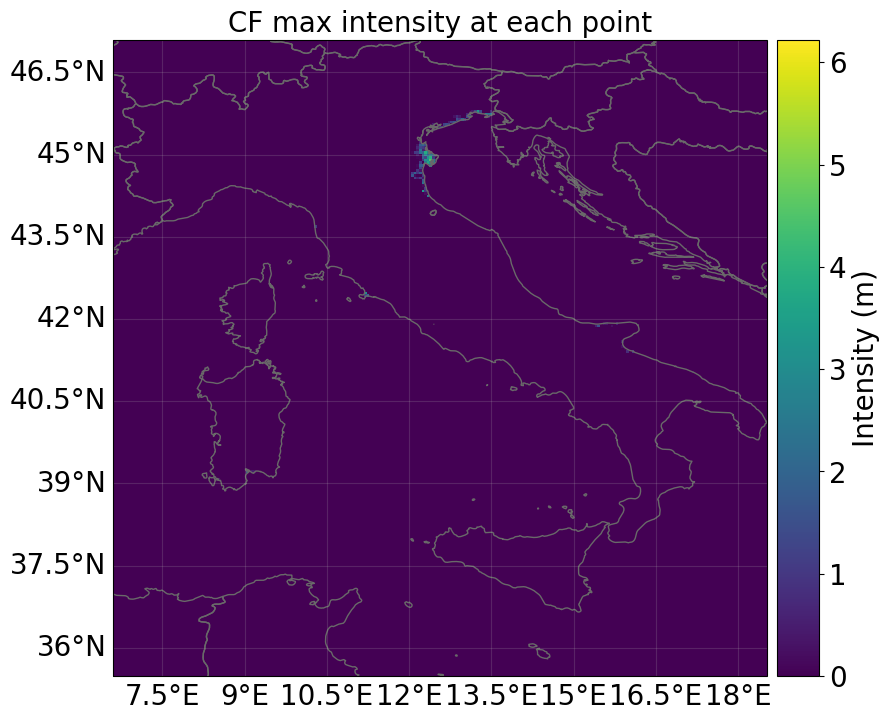

In [5]:
cf.plot_intensity(event=0)